In [1]:
import pyomo.environ as pyo
import matplotlib.pyplot as plt

solver = pyo.SolverFactory('ipopt')

In [2]:
def plot_results(P01M, P02M, P1,P2, b01, b02, model):
    coef = 2
    nb = 20
    vec_range = [coef * i / nb for i in range(nb+1)]

    plt.plot([p1*P01M for p1 in vec_range], [P02M for i in range(nb+1)], color = 'red')
    plt.plot([P01M for i in range(nb+1)], [p2*P02M for p2 in vec_range], color = 'red')
    plt.plot([p1 * P01M for p1 in vec_range], [(1+b02/b01) * P01M - p1 * P01M for p1 in vec_range], color = 'blue')
    plt.plot([p1 * P01M for p1 in vec_range], [(1+b01/b02) * P02M - p1 * P01M for p1 in vec_range], color = 'blue')
    plt.plot(P1, P2, 'x')
    plt.plot(P1 - model.ls1.value, P2 - model.ls2.value, 'x')
    plt.xlim(0, P01M * coef)
    plt.ylim(0, P02M * coef)
    plt.show()

In [3]:
P01M = 1.5
P02M = 1
P1 = 2.8
P2 = 1
b01 = 1
b02 = 1



Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.14.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.1081993579864502
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
 obj
1 Set Declarations
    br_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 : {'br',}

3 Var Declarations
    br : Size=1, Index=br_index
        Key : Lower : Value              : Upper : Fixed : Stale : Domain
         br :     0 : 1.0000000099749407 :     1 : False : False : Boolean
    ls1 : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 1.2889246893986837 :   2.8 : False : False : NonNegativeReals
    ls2 : Size=1, Index=None
        Key  : Lower : Value          

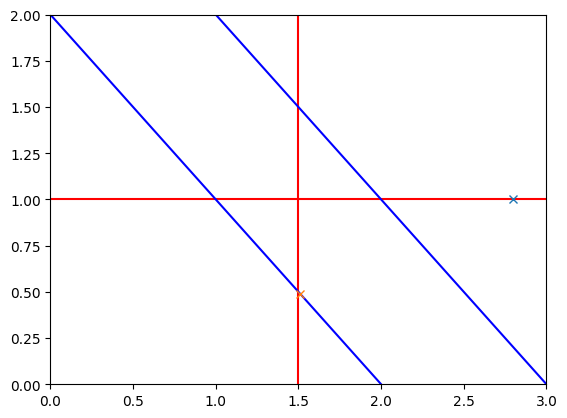

In [6]:
bM = 1e3

model = pyo.ConcreteModel()
model.ls1 = pyo.Var(bounds = (0, P1), domain = pyo.NonNegativeReals)
model.ls2 = pyo.Var(bounds = (0, P2), domain = pyo.NonNegativeReals)
model.br = pyo.Var(['br'], domain = pyo.Boolean)

def m_div (br):
    return (b01 * b02 + (b01 + b02) * br * bM)

def m_flow (br, b, p1, p2):
    return ((b01 * b02) * P1 + (b * bM * br) * (p1 + p2)) / m_div(br)

model.const1 = pyo.Constraint(rule = (0,
                                      m_flow(model.br['br'],
                                                b01,
                                                P1 - model.ls1,
                                                P2  - model.ls2),
                                      P01M))
model.const2 = pyo.Constraint(rule = (0,
                                      m_flow(model.br['br'],
                                                b02,
                                                P2 - model.ls2,
                                                P1 - model.ls1),
                                      P02M))

model.obj = pyo.Objective(rule = model.ls1 + model.ls2 - model.br['br'] * bM, sense = pyo.minimize)
# solver.solve(model)
print(solver.solve(model), model.obj)
model.pprint()
plot_results(P01M, P02M, P1,P2, b01, b02, model)